# Final Project: Modeling of volume change with iron in ferropericlase (Mg,Fe)O


### by Luisa Chavarria

## Contents
- [Objective](#objective)
- [Instructions](#instructions)
- [1. Import modules and libraries](#1-import-modules-and-libraries)
- [2. Upload the data and check validity](#2-upload-the-data-and-check-validity)
- [3. Vegard's Law](#3-vegard's-law)
- [4. Linear model - Least Squares Fit](#4-linear-model---least-squares-fit)
- [5. Compare LSF vs Vegard's Law](#5-compare-lsf-vs-vegard's-law)
- [6. Visualize change of volume in the unit cell](#6-visualize-change-of-volume-in-the-unit-cell)
- [7. Calculate the iron concentration based on the volume](#7-calculate-the-iron-concentration-based-on-the-volume)
- [8. Linting ](#8-linting)
- [9. References and Sources](#8-references-and-sources)


## Objective

This project looks to model the volume change of the mineral ferropericlase (Mg,Fe)O when there is a variation in the concentration of iron. 



## Instructions 

### How to run this notebook?

This notebook integrates the modules developed for: check data validity, calculate the linear model, the Vegard's law, compare both models, visualize the change of volume in the unit cell, and calculate the iron concentration based on the volume. 

Upload the "Fe_volume_fp.csv" file to run the data of volumes and concentrations of iron in ferropericlase. 

The modules and data files are contained in the GitHub repository: https://github.com/luisachavarria2/CMSE802_FinalProject.git



## 1. Import modules and libraries

In [1]:
## 1. Import Required Libraries and Modules

# Libraries

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit 
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Modules

from data_validator import check_data_validity
from vegards_volume import vegards_volume
from vegards_volume import plot_vegards_volume
from linear_lsf_confidence import linear_model
from linear_lsf_confidence import fit_and_plot_linear_model
from lsf_vegard import compare_models
from calculate_deviation import calculate_deviation_vegard
from plot_deviation import plot_deviation_vegard
from generator import generate_atoms 
from volume_unitcell import create_plots_cell
from fe_calculation import estimate_fe



## 2. Upload the data and check validity 



In [2]:
# Load data from a CSV

fp = pd.read_csv('Fe_volume_fp.csv') 

# Print the table with the data 

print(tabulate(fp, headers='keys', tablefmt='grid'))

# Extract Fe fraction and unit cell volume data and convert to Numpy arrays

x = fp['Fe_fraction'].to_numpy()        # Fe is expressed as a fraction 
V = fp['Volume_UnitCell'].to_numpy()    # Volume is in angstrom (A^3)

# Validate the data 

check_data_validity(x, V)     # Use the check_data_validity function from the module data_validator.py


+----+--------+-----------------+---------------+-------------------+-------------------------------+--------------+
|    | Name   |   Fe_percentage |   Fe_fraction |   Volume_UnitCell | Reference                     |   Unnamed: 5 |
+====+========+=================+===============+===================+===============================+==============+
|  0 | MgO    |             0   |         0     |            74.99  | Hazen (1976)                  |          nan |
+----+--------+-----------------+---------------+-------------------+-------------------------------+--------------+
|  1 | MgO    |             0   |         0     |            74.69  | Boiocchi et al (2001)         |          nan |
+----+--------+-----------------+---------------+-------------------+-------------------------------+--------------+
|  2 | Fp2.6  |             2.6 |         0.026 |            74.91  | Boiocchi et al (2001)         |          nan |
+----+--------+-----------------+---------------+---------------

## 3. Vegard's Law

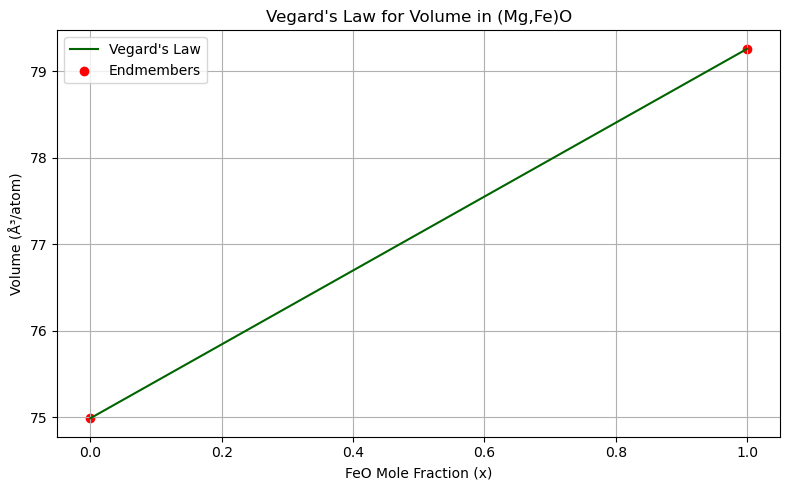

In [3]:
# Use the vegards_volume.py module and the fuction plot_vegards_volume to interpolate the end member concentrations of (Mg,Fe)O and calculate the volume. 

# Molar volumes of MgO and FeO 
V_MgO = 74.99  # A^3/atom
V_FeO = 79.26  # A^3/atom

# Plot interpolation
plot_vegards_volume(V_MgO, V_FeO)


## 4. Linear model - Least Squares Fit 

This module includes the linear model function and the fitting/plotting  code


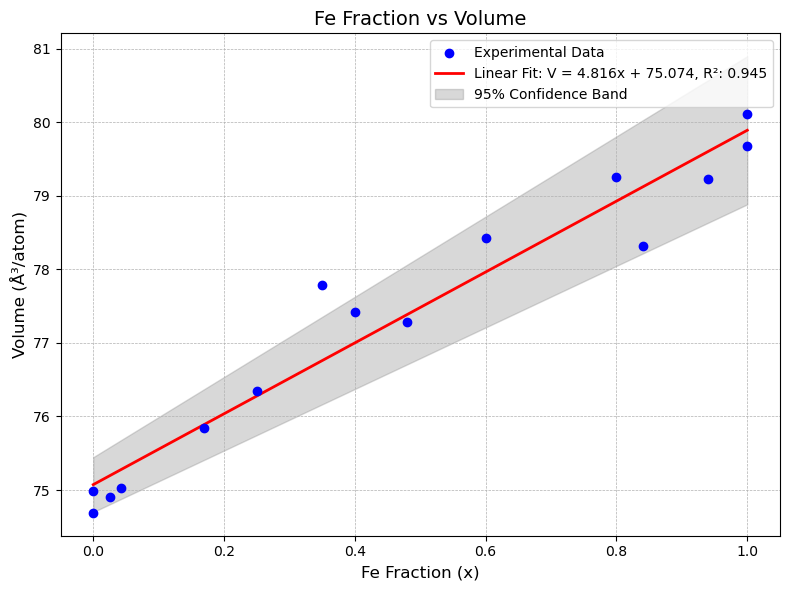

Fitted parameters: a = 4.816, b = 75.074
Linear Fit: V = 4.816x + 75.074
R²: 0.945
Confidence intervals (95%): a = ±0.634, b = ±0.373


In [4]:
# Use the linear_lsf_confidence.py module and th function fit_and_plot_linear_model to fit the experimental data from the compiled file 'Fe_volume_fp.csv'. 
# This function also allows to estimate the a,b variables, and also estimate the quatility of the data calculating the R^2 factor and showing the confidence interval with a  
# 95% confidence band.


# Estimate the parameters a,b,r2, and con_interval calling the function
# The output will provide the equation for the linear fit also

a, b, r2, conf_interval = fit_and_plot_linear_model(x, V)



# 5. Compare LSF vs Vegard's Law


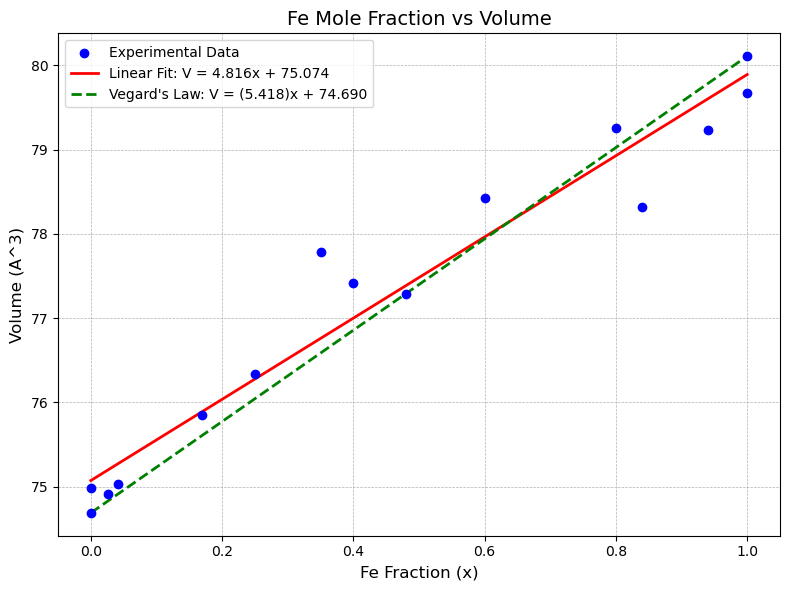

In [5]:
# Compare the Least squares fit model with the Vegard's Law model to estimate if it is reliable to use the LSF to calculate the volume and the iron concentration.

# Use the lsf_vegard.py module and the functions compare modules to obtain a plot with both models and the respective equations. 

# Molar volumes for the pure end-members (MgO and FeO)
V_MgO = 74.69  # volume for MgO (pure MgO)
V_FeO = 80.108  # volume for FeO (pure FeO)


#Fit the linear model and plot the results using the compare_models 
a, b = compare_models(x, V, V_MgO, V_FeO)

# Calculate the predicted molar volume from the Least Squares Fit
V_lsf = a * x + b



In [6]:
# Use the calculate_deviation.py module to estimate the mean_deviation, and mean_relative_deviation of the LSF vs the Vegard's law model

#Calculate the deviation using the calculated LSF values

mean_deviation, mean_relative_deviation = calculate_deviation_vegard(x, V, V_MgO, V_FeO, V_lsf)

# Output the deviation results
print(f"Mean Absolute Deviation: {mean_deviation:.3f} A^3")
print(f"Mean Relative Deviation: {mean_relative_deviation:.3f} %")

Mean Absolute Deviation: 0.219 A^3
Mean Relative Deviation: 0.286 %


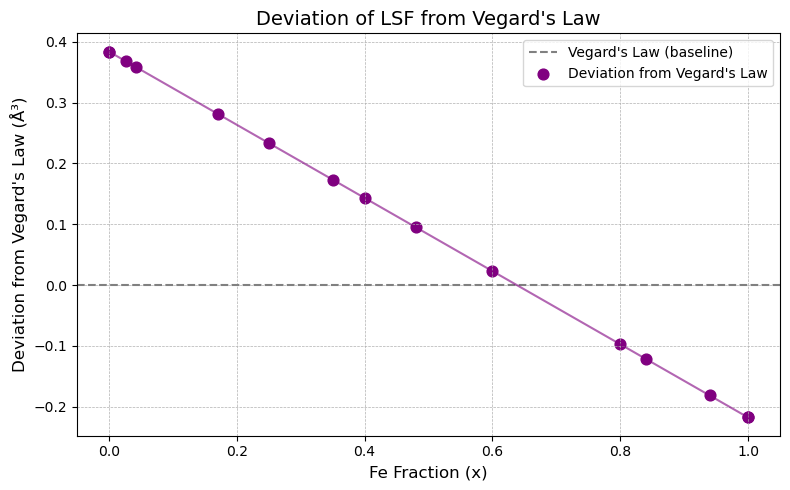

In [7]:
# Use the plot_deviation.py module with the function plot_deviation_vegard to visually observ the deviation of the LSF from the Vegard's law

plot_deviation_vegard(x, V_lsf, V_MgO, V_FeO)


## 6. Visualize change of volume in the unit cell

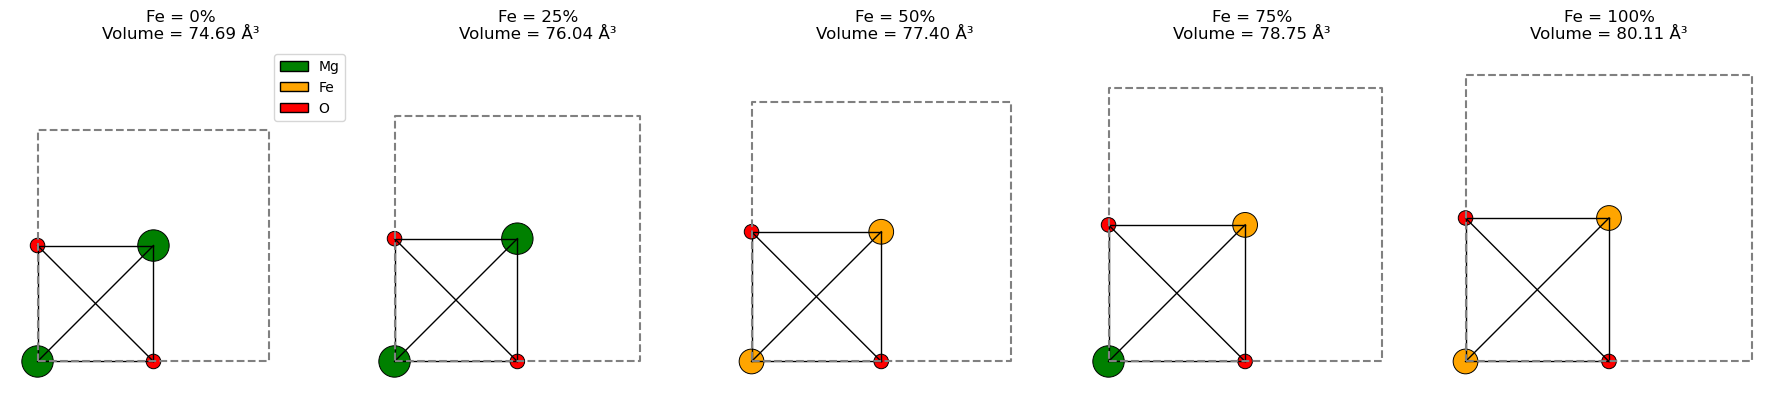

In [8]:
# Visualize the change of volume according to the concentration of iron. Use the module volume_unitcell.py with the function create_plots_cell

#Module to generate 2D visualizations of atomic configurations  in (Mg,Fe)O solid solutions. Atom positions and bond networks 
# are plotted for different Fe mole fractions, with visual exaggeration to highlight structural differences.


# Unit cell dimensions based on Vegard's Law equation

fe_fractions = [0.0, 0.25, 0.5, 0.75, 1.0]
a = 5.418    # example slope (Å³ per Fe fraction)
b = 74.690   # example intercept (Å³ for pure MgO)


create_plots_cell(fe_fractions, a, b)

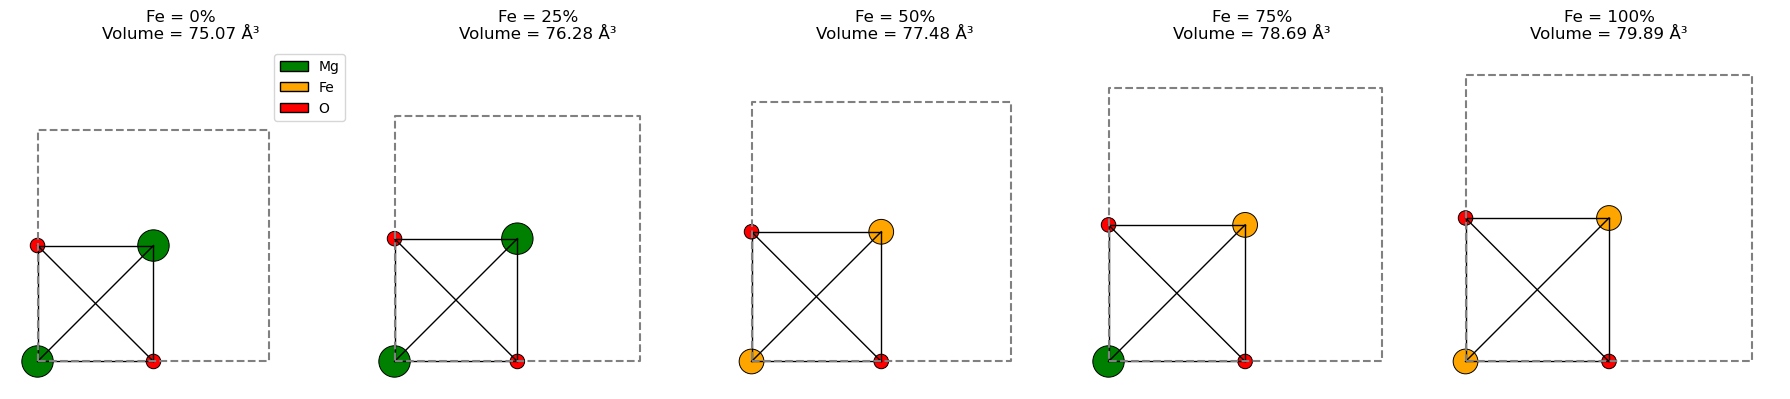

In [9]:
# Unit cell dimensions based on LSF equation

fe_fractions = [0.0, 0.25, 0.5, 0.75, 1.0]
a = 4.816   # example slope (Å³ per Fe fraction)
b = 75.074   # example intercept (Å³ for pure MgO)


create_plots_cell(fe_fractions, a, b)

## 7. Calculate the iron concentration based on the volume

In [10]:
# Based on the least squared fit model, calculate the iron concentration based on the volume provided from XRD data. 

# Using LSF

sample1= estimate_fe (76.42, 4.816, 75.074)
sample2= estimate_fe (77.73, 4.816, 75.074)


# Using Vegard's Law

sample1= estimate_fe (76.42, 5.418, 74.690)
sample2= estimate_fe (77.73, 5.418, 74.690)



For the volume = 76.42 Å³, the estimated Fe concentration is 27.95% (using a = 4.816, b = 75.074)
For the volume = 77.73 Å³, the estimated Fe concentration is 55.15% (using a = 4.816, b = 75.074)
For the volume = 76.42 Å³, the estimated Fe concentration is 31.93% (using a = 5.418, b = 74.69)
For the volume = 77.73 Å³, the estimated Fe concentration is 56.11% (using a = 5.418, b = 74.69)


## 8. Linting

In [11]:
# Flake8 on data_validator.py
!flake8 data_validator.py --count


data_validator.py:15:1: E302 expected 2 blank lines, found 1
data_validator.py:46:80: E501 line too long (131 > 79 characters)
data_validator.py:47:80: E501 line too long (126 > 79 characters)
3


In [12]:
# Flake8 on vegards_volume.py
!flake8 vegards_volume.py --count


vegards_volume.py:4:80: E501 line too long (80 > 79 characters)
vegards_volume.py:5:80: E501 line too long (82 > 79 characters)
vegards_volume.py:20:80: E501 line too long (83 > 79 characters)
vegards_volume.py:25:78: W291 trailing whitespace
vegards_volume.py:39:80: E501 line too long (90 > 79 characters)
5


In [13]:
# Flake8 on linear_lsf_confidence.py
!flake8 linear_lsf_confidence.py --count


linear_lsf_confidence.py:6:80: E501 line too long (84 > 79 characters)
linear_lsf_confidence.py:6:85: W291 trailing whitespace
linear_lsf_confidence.py:7:80: E501 line too long (81 > 79 characters)
linear_lsf_confidence.py:7:82: W291 trailing whitespace
linear_lsf_confidence.py:44:80: E501 line too long (87 > 79 characters)
linear_lsf_confidence.py:80:80: E501 line too long (102 > 79 characters)
linear_lsf_confidence.py:84:80: E501 line too long (93 > 79 characters)
7


In [14]:
# Flake8 on calculate_deviation.py
!flake8 calculate_deviation.py --count

calculate_deviation.py:4:80: E501 line too long (80 > 79 characters)
calculate_deviation.py:4:81: W291 trailing whitespace
calculate_deviation.py:16:80: E501 line too long (85 > 79 characters)
calculate_deviation.py:16:86: W291 trailing whitespace
calculate_deviation.py:18:1: W293 blank line contains whitespace
calculate_deviation.py:31:1: W293 blank line contains whitespace
calculate_deviation.py:37:1: W293 blank line contains whitespace
calculate_deviation.py:40:1: W293 blank line contains whitespace
calculate_deviation.py:43:80: E501 line too long (97 > 79 characters)
9


In [15]:
# Flake8 on plot_deviation.py
!flake8 plot_deviation.py --count


plot_deviation.py:4:72: W291 trailing whitespace
plot_deviation.py:5:77: W291 trailing whitespace
plot_deviation.py:18:1: W293 blank line contains whitespace
plot_deviation.py:35:1: W293 blank line contains whitespace
plot_deviation.py:38:1: W293 blank line contains whitespace
5


In [16]:
# Flake8 on generator.py
!flake8 generator.py --count


generator.py:32:80: E501 line too long (81 > 79 characters)
1


In [17]:
# Flake8 on volume_unitcell.py
!flake8 volume_unitcell.py --count


volume_unitcell.py:14:80: E501 line too long (84 > 79 characters)
volume_unitcell.py:19:80: E501 line too long (83 > 79 characters)
volume_unitcell.py:20:1: E731 do not assign a lambda expression, use a def
volume_unitcell.py:20:80: E501 line too long (81 > 79 characters)
volume_unitcell.py:67:80: E501 line too long (93 > 79 characters)
volume_unitcell.py:81:9: F841 local variable 'actual_a' is assigned to but never used
6


In [18]:
# Flake8 on fe_calculation.py
!flake8 fe_calculation.py --count


fe_calculation.py:36:80: E501 line too long (80 > 79 characters)
1


## 9. References and Sources

List any papers, books, websites, or other resources you've consulted or plan to use for your project. Use proper citation format.


Websites:


2. OpenAI. ChatGPT. April 16, 2025. OpenAI. https://chat.openai.com. (Planning and coding of the project)

